# Smoothing Land-Ocean Temperature Data

This workflow **loads a data file** with global temperature data and **smooths it with several different algorithms**. At the end you can **select a particular year range** and **create a new data file** containing the smoothed data for the range desired.

In [ ]:
import pandas as pd
import os

## Load data from file

In [ ]:
# Load data into memory from file
DATA_DIR = 'data'
DATA_FILE = 'land-ocean-temp-index.csv'

df = pd.read_csv(os.path.join(DATA_DIR, DATA_FILE), escapechar='#')
df

,Year,Temperature
0,1880,-0.15
1,1881,-0.07
2,1882,-0.09
3,1883,-0.16
4,1884,-0.27
...,...,...
135,2015,0.90
136,2016,1.02
137,2017,0.93
138,2018,0.86


## Plot original data

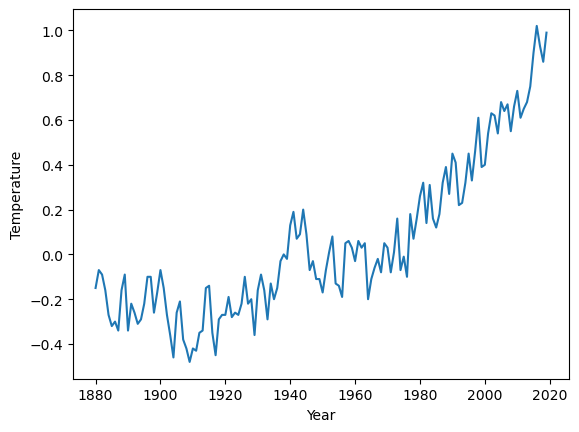

In [ ]:
from matplotlib import pyplot as plt

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.plot(df['Year'], df['Temperature'])
plt.show()

## Add column for Savitzky-Golay filter

In [ ]:
from scipy.signal import savgol_filter

# Set the window size and polynomial order for the Savitzky-Golay filter
window_size = 7
poly_order = 5

# Apply Savitzky-Golay smoothing to the Temperature column
df['Savitzky-Golay'] = savgol_filter(df['Temperature'], window_size, poly_order)
df

,Year,Temperature,Savitzky-Golay
0,1880,-0.15,-0.149665
1,1881,-0.07,-0.072013
2,1882,-0.09,-0.084968
3,1883,-0.16,-0.166710
4,1884,-0.27,-0.267186
...,...,...,...
135,2015,0.90,0.908658
136,2016,1.02,0.999654
137,2017,0.93,0.945260
138,2018,0.86,0.853896


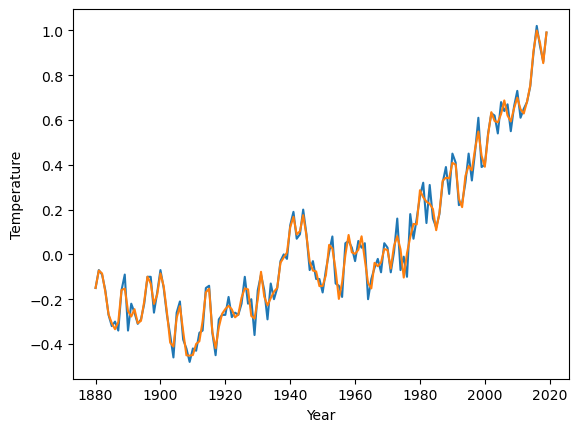

In [ ]:
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.plot(df['Year'], df['Temperature'])
plt.plot(df['Year'], df['Savitzky-Golay'])
plt.show()

## Select a range of data

In [ ]:
from_year = 1920
to_year = 1980

In [ ]:
selected_range = df[(df['Year'] >= from_year) & (df['Year'] <= to_year)]

## All Together Now

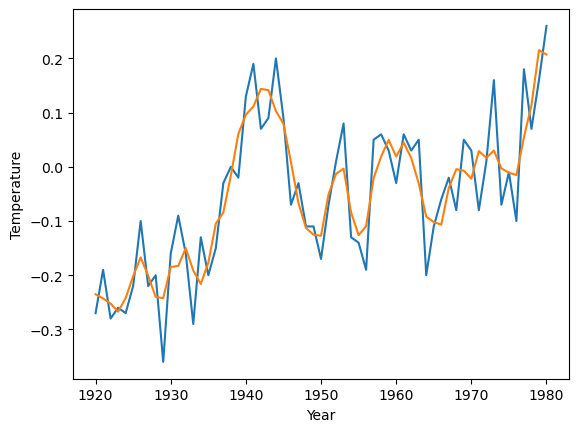

In [ ]:
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.plot(selected_range['Year'], selected_range['Temperature'])
plt.plot(selected_range['Year'], selected_range['Savitzky-Golay']) 
plt.show()

## Save selected data to file

In [ ]:
selected_range.to_csv('data/output.csv', index=False)